Di tahun 2023 terjadi kasus BSI yang mengalami serangan Ransomware, sehingga
menggangu fungsi Bank ini secara nasional. Pengguna twitter (X) banyak mengunggah tweet memberikan respon terhadap kasus ini. Penasaran dengan apa saja yang dibicarakan user mengenai kasus ini di twitter (X), anda diminta melakukan pemodelan terhadap data kumpulan tweet pengguna dengan detail sebagai berikut:

### **Import lib**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import string
import zipfile
import os

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords, words
from nltk.tokenize import WordPunctTokenizer, word_tokenize
from string import punctuation
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, silhouette_score
from google.colab import files
import regex
import re
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### **Prepare**

In [ ]:
# Import Dataset
df2 = pd.read_csv('data_2D.csv')
df2.head()

,Unnamed: 0,index,URL,Date,Tweet,ID,Username,Replies,Reetweets,Likes,Quotes,conversationId,Language,Links,Media,Retweeted Tweet,Bookmarks
0,0,1412,https://twitter.com/oksihen/status/16584282698...,2023-05-16 11:04:46+00:00,@__nsch @bankbsi_id @Bittersweutz kak mendinga...,1658428269849608192,oksihen,1,0,0,0,1655777758180708355,in,NaN,NaN,NaN,0
1,1,23337,https://twitter.com/reixyynx/status/1655911656...,2023-05-09 12:24:38+00:00,@Adelyaaav @med_faqih08 @bankbsi_id sore ini p...,1655911656407580672,reixyynx,0,0,0,0,1655781242166710273,in,NaN,NaN,NaN,0
2,2,23099,https://twitter.com/sheyappe/status/1655924302...,2023-05-09 13:14:54+00:00,@SeokjinRie @bankbsi_id dih ternyata transfer ...,1655924302917804033,sheyappe,1,0,0,0,1655909697399177217,in,NaN,NaN,NaN,0
3,3,5691,https://twitter.com/tfouive/status/16575732480...,2023-05-14 02:27:13+00:00,@bankbsi_id kalo ambil duitnya langsung ke ban...,1657573248035586048,tfouive,1,0,0,0,1657346196548239360,in,NaN,NaN,NaN,0
4,4,16823,https://twitter.com/itshaeyoz/status/165648391...,2023-05-11 02:18:35+00:00,@bankbsi_id min ayo dong kasi tau info ke nasa...,1656483914373005312,itshaeyoz,1,0,2,0,1655777758180708355,in,NaN,NaN,NaN,0


In [ ]:
# Pake data yg dipake aja
df2_new = df2[['Tweet']]
df2_new.head()

,Tweet
0,@__nsch @bankbsi_id @Bittersweutz kak mendinga...
1,@Adelyaaav @med_faqih08 @bankbsi_id sore ini p...
2,@SeokjinRie @bankbsi_id dih ternyata transfer ...
3,@bankbsi_id kalo ambil duitnya langsung ke ban...
4,@bankbsi_id min ayo dong kasi tau info ke nasa...


In [ ]:
df2_new.isna().sum()

Tweet    0
dtype: int64

a. Lakukan pengelompokan dengan menggunakan **pendekatan clustering**, silahkan ujicoba beberapa nilai cluster (k) yang mungkin anda peroleh dari data tersebut, berikan perbandingan silhoutte score sebagai justifikasi jumlah cluster (k) yang akan anda pilih.

### **Data Cleaning**

In [ ]:
# Remove punctutation
def punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
df2_new['clean_tweet'] = df2_new['Tweet'].apply(punctuation)

<ipython-input-7-a0771efe59a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_new['clean_tweet'] = df2_new['Tweet'].apply(punctuation)



Menghapus tanda baca bertujuan untuk membersihkan teks dari karakter-karakter yang tidak diperlukan untuk analisis. Tanda baca tidak memberikan kontribusi terhadap makna dari teks dalam konteks analisis teks

In [ ]:
# Remove emojis
def remove_emojis(text):
    if not isinstance(text, str):
        return text
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # other symbols
        u"\U000024C2-\U0001F251"  # enclosed characters
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

df2_new['clean_tweet'] = df2_new['clean_tweet'].apply(remove_emojis)

<ipython-input-8-14d4d28d7d20>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_new['clean_tweet'] = df2_new['clean_tweet'].apply(remove_emojis)


Menghapus emoji membuat teks lebih bersih dan konsisten.

In [ ]:
def clean_text(text):
    text = text.lower()
    # menghilangkan link
    text = re.sub(r'\S*https?://\S*', '', text)
    # menghilangkan @
    text = re.sub(r'@\w+', "", text)
    # menghilangkan #
    text = re.sub(r'#\w+', "", text)
    # menghilangkan angka
    text = re.sub(r'\d+', "", text)
    return text

df2_new['clean_tweet'] = df2_new['clean_tweet'].apply(clean_text)

<ipython-input-9-e85ebf5d7cb4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_new['clean_tweet'] = df2_new['clean_tweet'].apply(clean_text)


In [ ]:
# Stopwords
ind_stopwords = stopwords.words('indonesian')
def remove_stopwords(text):
    words = word_tokenize(text)
    words_without_stopwords = [word for word in words if word.lower() not in ind_stopwords]
    return ' '.join(words_without_stopwords)

df2_new['clean_tweet'] = df2_new['clean_tweet'].apply(remove_stopwords)

<ipython-input-10-ad9528620276>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_new['clean_tweet'] = df2_new['clean_tweet'].apply(remove_stopwords)


Stopwords adalah kata-kata umum yang sering muncul dalam teks tapi tidak memberikan banyak informasi (seperti "the", "is", "in", "and"). Menghapus stopwords membantu dalam mengurangi dimensionalitas teks dan fokus pada kata-kata yang lebih informatif.

In [ ]:
# Tokenization
def tokenize(text):
    return word_tokenize(text)

df2_new['clean_tweet'] = df2_new['clean_tweet'].apply(tokenize)

<ipython-input-11-51f01f5c7b2c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_new['clean_tweet'] = df2_new['clean_tweet'].apply(tokenize)


Tokenisasi adalah proses memecah teks menjadi unit-unit kata (token). Untuk menghitung frekuensi kata atau membangun model berbasis kata.

In [ ]:
# Lemmatization
word_lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    lemmatized_words = [word_lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_words

df2_new['clean_tweet'] = df2_new['clean_tweet'].apply(lemmatize_text)

<ipython-input-12-0df3e2dde769>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_new['clean_tweet'] = df2_new['clean_tweet'].apply(lemmatize_text)


Lemmatization mengubah kata-kata ke bentuk dasar atau lema mereka, mengurangi variasi kata ke bentuk standar. Ini membantu dalam menyatukan bentuk-bentuk kata yang berbeda ke satu bentuk dasar yang sama sehingga analisis menjadi lebih konsisten.

In [ ]:
df2_new.head()

,Tweet,clean_tweet
0,@__nsch @bankbsi_id @Bittersweutz kak mendinga...,"[nsch, bankbsiid, bittersweutz, kak, mendingan..."
1,@Adelyaaav @med_faqih08 @bankbsi_id sore ini p...,"[adelyaaav, medfaqih, bankbsiid, sore]"
2,@SeokjinRie @bankbsi_id dih ternyata transfer ...,"[seokjinrie, bankbsiid, dih, transfer, bank]"
3,@bankbsi_id kalo ambil duitnya langsung ke ban...,"[bankbsiid, kalo, ambil, duitnya, langsung, ba..."
4,@bankbsi_id min ayo dong kasi tau info ke nasa...,"[bankbsiid, min, ayo, kasi, tau, info, nasabah..."


In [214]:
# 'clean_tweet' jdi string
df2_new['clean_tweet'] = df2_new['clean_tweet'].astype(str)

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=3)

# Fit dan transform data teks
tfidf_matrix = tfidf_vectorizer.fit_transform(df2_new['clean_tweet'])

<ipython-input-214-d124a98ea592>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_new['clean_tweet'] = df2_new['clean_tweet'].astype(str)


In [219]:
tfidf_matrix.shape

(6101, 2791)

### **Text Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


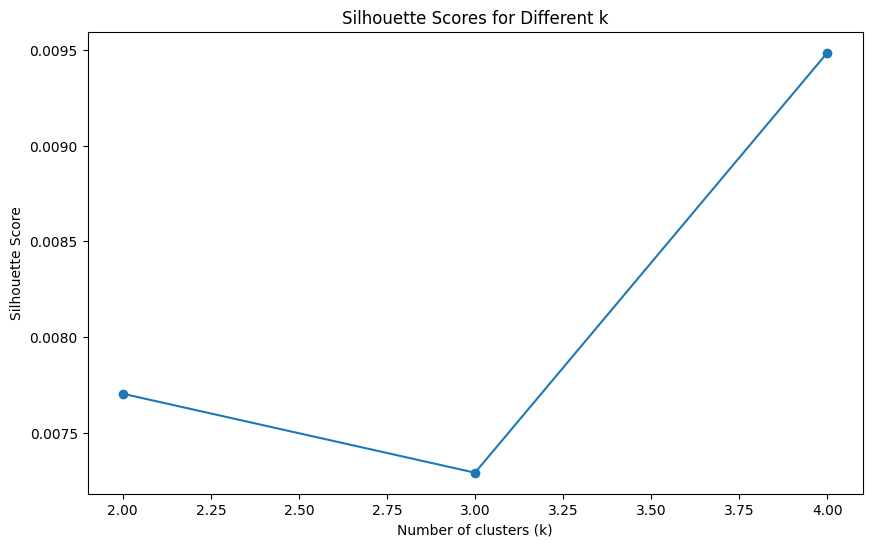

In [241]:
# Define a range of k values
k_values = range(2, 5)
silhouette_scores = []

# Loop through the range of k values
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(tfidf)
    cluster_labels = km.labels_
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

In [242]:
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f'The optimal number of clusters is {optimal_k}')

The optimal number of clusters is 4


**Jumlah cluster optimal adalah 4** berdasarkan skor siluet yang ditampilkan. Skor siluet mengukur seberapa mirip suatu objek dengan cluster-nya sendiri dibandingkan dengan cluster lainnya. Skor siluet yang lebih tinggi menunjukkan cluster yang lebih baik.

Plot menunjukkan skor siluet meningkat dari 2 hingga 4 cluster. Skor untuk 4 cluster adalah yang tertinggi, menunjukkan kualitas clustering terbaik.

**Skor Lebih Tinggi, Clustering Lebih Baik**: Skor siluet untuk 4 cluster lebih tinggi dibandingkan 3 cluster, menunjukkan clustering dengan 4 cluster lebih baik terdefinisi dan lebih terpisah.

In [223]:
# Silhouette Scores
for optimal in k_values:
    kmeans = KMeans(n_clusters = optimal, random_state = 42)
    kmeans.fit(tfidf_matrix)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(tfidf_matrix, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [224]:
for optimal, score in zip(k_values, silhouette_scores):
    print(f'Clustering (k={optimal}): Silhouette Score = {score:.4f}')

Clustering (k=2): Silhouette Score = 0.0077
Clustering (k=3): Silhouette Score = 0.0073
Clustering (k=4): Silhouette Score = 0.0095


Skor Siluet Rendah: Semua nilai k yang diuji (k=2, k=3, k=4) menghasilkan skor siluet yang sangat rendah, yang menunjukkan bahwa clustering tidak memberikan pemisahan yang baik antara cluster.
Pemilihan K: Berdasarkan skor siluet ini, tidak ada nilai k yang memberikan hasil clustering yang memuaskan. Ini mungkin menunjukkan bahwa pendekatan clustering yang digunakan atau fitur yang dipilih untuk clustering tidak cukup efektif dalam memisahkan data.

In [225]:
# KMeans clustering (k = 3)
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(tfidf_matrix)
labels = kmeans.labels_

df2_new['Cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-225-2381882195d6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_new['Cluster'] = labels


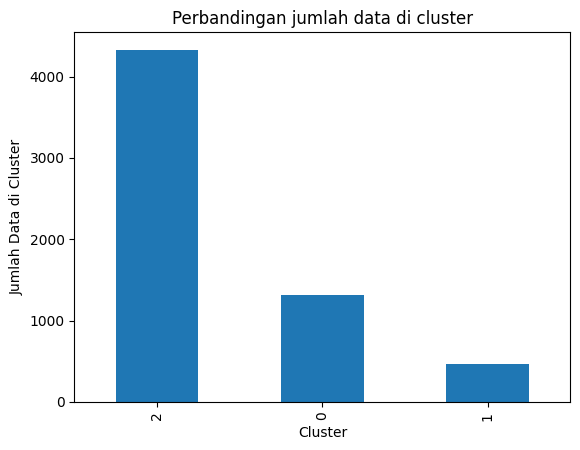

In [226]:
df2_new['Cluster'].value_counts().plot.bar()
plt.title('Perbandingan jumlah data di cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data di Cluster')
plt.show()

b. Lakukan **persona analysis** untuk cluster yang anda hasilkan, jelaskan informasi yang anda peroleh mengenai cluster tersebut berdasarkan personanya.

**Cluster 0 :**
- Kata kunci: @bankbsi_id, bisa, di, ini, ke, masih, BSI, udah, belum, aja
- Topik cluster: Keluhan mengenai layanan yang tidak tersedia di Bank
- Cluster ini memiliki karakteristik tweet mengenai pertanyaan atau keluhan mengenai layanan yang tidak tersedia di Bank BSI. Pengguna sering menyebutkan masalah yang mereka hadapi seperti mobile banking yang tidak berfungsi, transaksi yang tertunda, dan layanan lainnya yang belum bisa diakses. Contoh tweet termasuk permintaan bantuan untuk memperbaiki layanan mobile banking dan keluhan mengenai transaksi yang belum berhasil.

**Cluster 1 :**
- Kata kunci: @bankbsi_id, bisa, di, ke, bank, ini, BSI, bsi, ga, saya
- Topik cluster: Keluhan mengenai layanan yang down di Bank
- Cluster ini memiliki karakteristik tweet mengenai keluhan atau ketidakpuasan pelanggan mengenai jasa pelayanan di Bank BSI. Pengguna sering mengeluhkan masalah teknis yang membuat mereka tidak dapat menggunakan layanan perbankan, seperti ATM yang tidak berfungsi, layanan mobile banking yang sering down, dan masalah lainnya yang mengganggu akses ke layanan bank. Mereka juga sering meminta penjelasan dan bantuan dari pihak bank melalui media sosial.

**Cluster 2 :**
- Kata kunci: @bankbsi_id, bank, BSI, di, yg, Bank, yang, dan, ada, @secgron
- Topik cluster: Pertanyaan mengenai kesediaan transfer Bank
- Cluster ini memiliki karakteristik tweet mengenai pertanyaan mengenai kesediaan pelayanan transfer di Bank BSI. Pengguna sering membandingkan layanan BSI dengan bank lain dan menanyakan tentang kapan layanan akan kembali normal. Selain itu, beberapa pengguna juga memberikan kritik terhadap layanan yang diberikan dan meminta perbaikan atau peningkatan kualitas layanan.


c. **Membandingkan hasil clustering dengan metode lain** yaitu topic extraction, sehingga anda perlu melakukan pemodelan topic extraction. Jelaskan metode topic extraction yang anda lakukan

In [191]:
from collections import Counter

In [189]:
from sklearn.decomposition import PCA

In [188]:
import seaborn as sns

In [229]:
# Apply LDA for topic modeling
n_topics = 3
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_matrix = lda.fit_transform(tfidf_matrix)

<ipython-input-230-e70da7000419>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_new['pca_dim1'] = pca_results[:, 0]
<ipython-input-230-e70da7000419>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_new['pca_dim2'] = pca_results[:, 1]
<ipython-input-230-e70da7000419>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

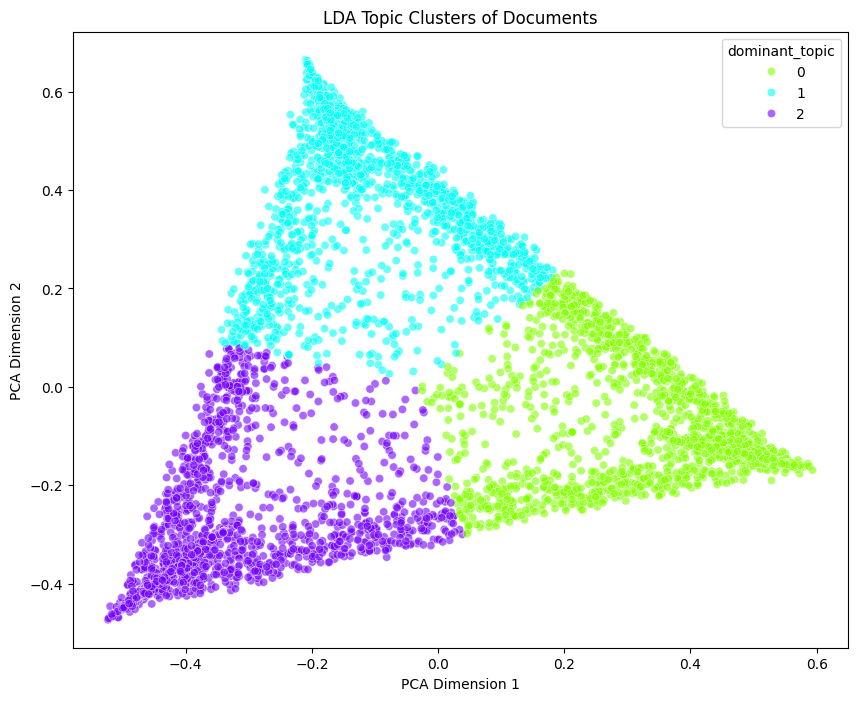

In [230]:
# Apply PCA to reduce dimensions of LDA results
pca = PCA(n_components=2)
pca_results = pca.fit_transform(lda_matrix)

# Add PCA results and dominant topic to the DataFrame
df2_new['pca_dim1'] = pca_results[:, 0]
df2_new['pca_dim2'] = pca_results[:, 1]
df2_new['dominant_topic'] = lda_matrix.argmax(axis=1)

# Plot the results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='pca_dim1', y='pca_dim2',
    hue='dominant_topic',
    palette=sns.color_palette('hsv', n_topics),
    data=df2_new,
    legend="full",
    alpha=0.6
)
plt.title('LDA Topic Clusters of Documents')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()

Gambar menunjukkan hasil clustering topik dengan menggunakan Latent Dirichlet Allocation (LDA) yang divisualisasikan menggunakan PCA. Ada tiga topik dominan yang diidentifikasi, masing-masing diberi label 0, 1, dan 2, dan diwakili oleh warna yang berbeda.

- **Pemisahan Klaster yang Jelas:**
Grafik menunjukkan pemisahan yang cukup jelas antara tiga klaster. Ini menunjukkan bahwa LDA berhasil mengidentifikasi topik-topik yang berbeda dalam data.
- Dengan mengidentifikasi topik yang dominan, Bank BSI dapat memahami masalah utama yang dihadapi pengguna mereka. Ini dapat membantu dalam mengidentifikasi area yang membutuhkan perbaikan yg lebih efektif

In [234]:
# Extract and display the most common words in each topic cluster
for topic in range(n_topics):
    print(f"\nTweets in Topic {topic}:\n")
    print(df2_new[df2_new['dominant_topic'] == topic]['Tweet'].head(10))

    # Most common words in each topic cluster
    cluster_data = df2_new[df2_new['dominant_topic'] == topic]
    all_words = ' '.join(cluster_data['Tweet']).split()
    common_words = Counter(all_words).most_common(10)
    print(f"\nCommon words in Topic {topic}:\n", common_words)

    # Masi pake data raw


Tweets in Topic 0:

5     @RochmatPurwanto @bankbsi_id @bank_indonesia T...
6         @ezryy_ @bankbsi_id Tapi kau sahabat bri cing
10           @Bagi95991655 @y0nkke @bankbsi_id Wkwkwkwk
12    Tolong @bankbsi_id, mobile banking cepat diben...
14    halo @bankbsi_id ini masih belum bisa transaks...
18    @bankbsi_id min kok punya ku belum bisa dibuka...
19    @bankbsi_id ini gimana ya kelamaan down nya, s...
20    @bukerleeseo Aku udh hubungi di dm twt. Email ...
22    @jirajirr @bankbsi_id berangsur pulih, tapi tr...
25    @bankbsi_id atm sekarangpun tidak berfungsi la...
Name: Tweet, dtype: object

Common words in Topic 0:
 [('@bankbsi_id', 2272), ('bisa', 985), ('di', 431), ('ini', 420), ('ke', 364), ('masih', 354), ('BSI', 321), ('udah', 295), ('belum', 290), ('aja', 277)]

Tweets in Topic 1:

0     @__nsch @bankbsi_id @Bittersweutz kak mendinga...
1     @Adelyaaav @med_faqih08 @bankbsi_id sore ini p...
3     @bankbsi_id kalo ambil duitnya langsung ke ban...
4     @bankbsi_id min 

In [238]:
# Function to display topics
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print("\n")

# Display the topics
n_top_words = 15
feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(lda, feature_names, n_top_words)

Topic #1:
bankbsiid atm udah bsi mobile ka ya kak aja min ga mbanking sampe transaksi nya


Topic #2:
bankbsiid min rochmatpurwanto bsi transfer bank saldo gimana ya ga rekening kak up top masuk


Topic #3:
bankbsiid bank bsi secgron syariah yg nasabah data indonesia partaisocmed aceh dm sistem ganti ransomware




##### d. **Lakukan persona analysis kembali** untuk topik yang anda peroleh, bandingkan apa yang anda peroleh dari pendekatan clustering dan topic extraction. Paparkan hal-hal menarik yang berhasil anda ekstrak.

**Persona Analysis Using Topic Extraction:** <br>
**Topic 1:**
- Kata kunci: @bankbsi_id, atm, udah, bsi, mobile, ka, ya, kak, aja, min, ga, mbanking, sampe, transaksi, nya
- Persona: Pengguna yang mengeluhkan masalah teknis
- Deskripsi: Pengguna ini sering mengeluhkan masalah teknis yang dihadapi saat menggunakan layanan Bank BSI, terutama terkait mobile banking dan ATM.

**Topic 2:** <br>
- Kata kunci: @bankbsi_id, min, rochmatpurwanto, bsi, transfer, bank, saldo, gimana, ya, ga, rekening, kak, up, top, masuk
- Persona: Pengguna yang membutuhkan bantuan dan informasi
- Deskripsi: Pengguna ini sering mencari bantuan dan informasi mengenai transaksi dan saldo di Bank BSI.

**Topic 3:** <br>
- Kata kunci: @bankbsi_id, bank, bsi, secgron, syariah, yg, nasabah, data, indonesia, partaisocmed, aceh, dm, sistem, ganti, ransomware
- Persona: Pengguna yang kritis dan membandingkan layanan
- Deskripsi: Pengguna ini sering membandingkan layanan Bank BSI dengan bank lain, mengkritik layanan yang ada, dan mencari perbaikan atau peningkatan kualitas.


**Comparison of Clustering and Topic Extraction:** <br>
Clustering Analysis:
- Focus: Mengelompokkan tweet yang mirip berdasarkan kesamaan keseluruhan dalam kontennya.
- Insight: Pengguna memiliki banyak keluhan mengenai ketersediaan dan stabilitas layanan Bank BSI.
- Pattern: Masalah teknis adalah isu utama yang dihadapi oleh pengguna.

Topic Extraction Analysis:
- Focus: Mengidentifikasi topik-topik spesifik dalam tweet.
- Insight: Selain masalah teknis, pengguna juga sangat membutuhkan informasi dan bantuan yang cepat dari pihak bank.
- Pattern: Pengguna sering membandingkan layanan Bank BSI dengan bank lain dan mengkritik kekurangan yang ada.



**summary:** <br>
Untuk gambaran umum tingkat tinggi dan identifikasi cepat masalah utama:
- Clustering lebih cocok karena mengelompokkan keluhan atau pertanyaan serupa secara efisien dan menawarkan perspektif luas tentang sentimen pengguna.

Untuk analisis mendetail dan pemahaman yang lebih terperinci tentang topik spesifik:
- Ekstraksi Topik (LDA) lebih efektif karena memberikan wawasan mendalam tentang masalah spesifik dan subtopik yang dibahas pengguna.